In [54]:
import pandas as pd
import numpy as np
from math import *

## Libraries for data visualization 

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns 
import plotly.express as px
import dabl

In [19]:
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [4]:
df = pd.read_csv('StudentsPerformance.csv')

In [5]:
df.shape #data shape

(1000, 8)

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Checking no of unique elements in categorical columns

In [10]:
df.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Data Exploration

In [12]:
sns.set_theme()

## Comparison of all attributes with respect to Math Score

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=2.01E+03'}, xlabel='reading score', ylabel='math score'>,
         <AxesSubplot:title={'center':'F=1.81E+03'}, xlabel='writing score'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=7.02E-02'}, xlabel='math score', ylabel='gender'>,
         <AxesSubplot:title={'center':'F=3.25E-02'}, xlabel='math score', ylabel='race/ethnicity'>,
         <AxesSubplot:title={'center':'F=1.19E-02'}, xlabel='math score', ylabel='parental level of...'>,
         <AxesSubplot:title={'center':'F=1.68E-03'}, xlabel='math score', ylabel='lunch'>,
         <AxesSubplot:title={'center':'F=0.00E+00'}, xlabel='math score', ylabel='test preparation ...'>]],
       dtype=object)]

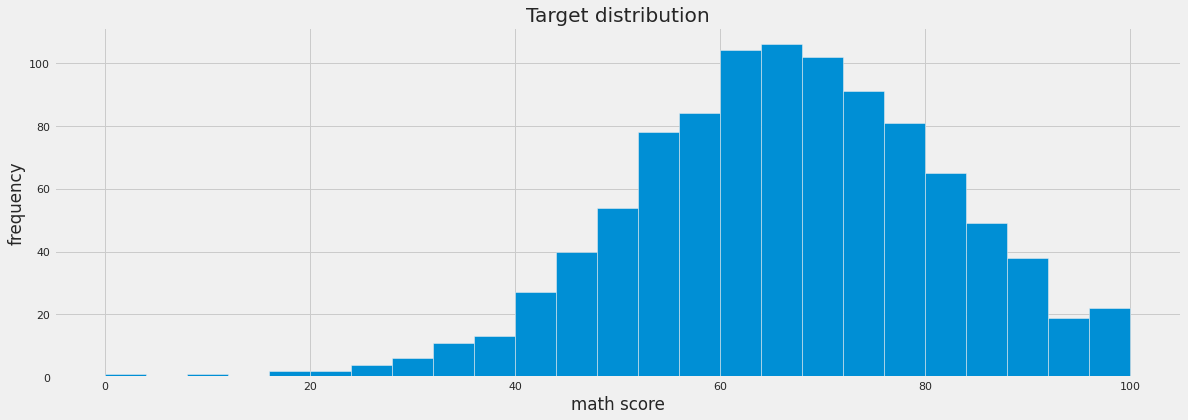

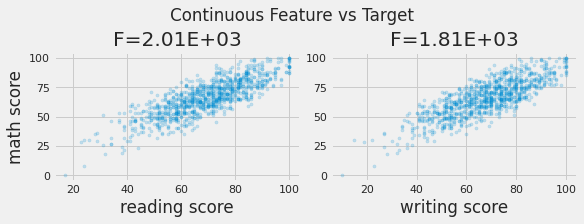

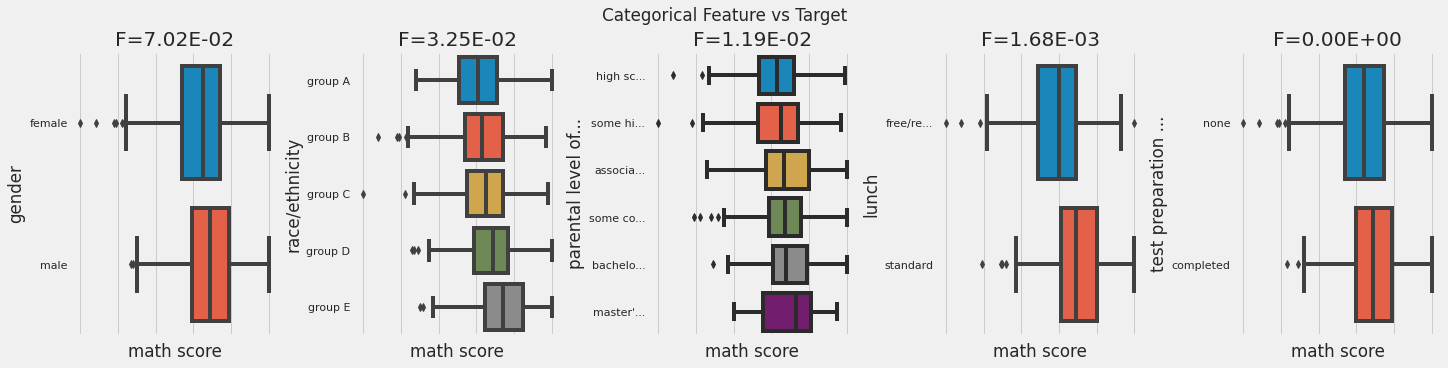

In [20]:
mp.rcParams['figure.figsize'] = (18,6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col = 'math score')

## Comparing all other attributes with respect to reading score

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=1.02E+04'}, xlabel='writing score', ylabel='reading score'>,
         <AxesSubplot:title={'center':'F=2.01E+03'}, xlabel='math score'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=5.07E-02'}, xlabel='reading score', ylabel='gender'>,
         <AxesSubplot:title={'center':'F=3.27E-02'}, xlabel='reading score', ylabel='race/ethnicity'>,
         <AxesSubplot:title={'center':'F=7.83E-03'}, xlabel='reading score', ylabel='parental level of...'>,
         <AxesSubplot:title={'center':'F=6.37E-03'}, xlabel='reading score', ylabel='lunch'>,
         <AxesSubplot:title={'center':'F=0.00E+00'}, xlabel='reading score', ylabel='test preparation ...'>]],
       dtype=object)]

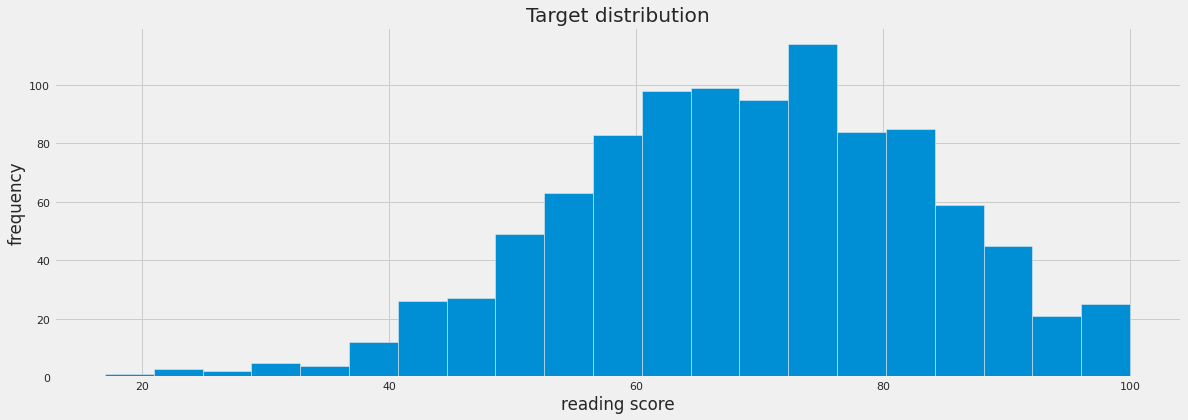

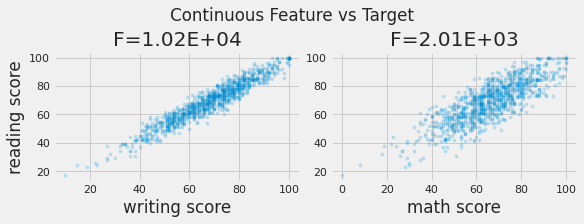

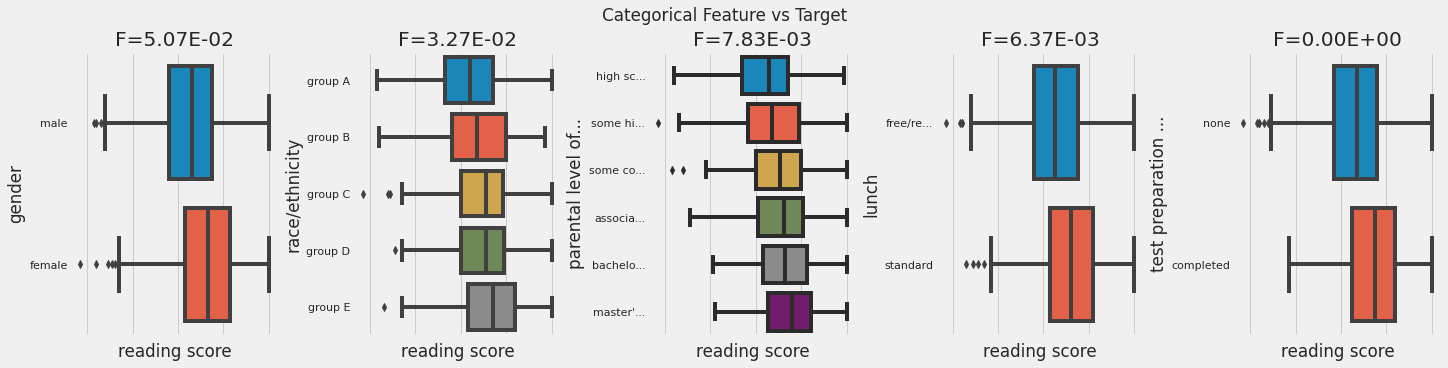

In [21]:
plt.rcParams['figure.figsize'] = (18,6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col='reading score')

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=1.02E+04'}, xlabel='reading score', ylabel='writing score'>,
         <AxesSubplot:title={'center':'F=1.81E+03'}, xlabel='math score'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=7.53E-02'}, xlabel='writing score', ylabel='gender'>,
         <AxesSubplot:title={'center':'F=7.17E-02'}, xlabel='writing score', ylabel='race/ethnicity'>,
         <AxesSubplot:title={'center':'F=6.94E-02'}, xlabel='writing score', ylabel='parental level of...'>,
         <AxesSubplot:title={'center':'F=4.32E-02'}, xlabel='writing score', ylabel='lunch'>,
         <AxesSubplot:title={'center':'F=3.03E-02'}, xlabel='writing score', ylabel='test preparation ...'>]],
       dtype=object)]

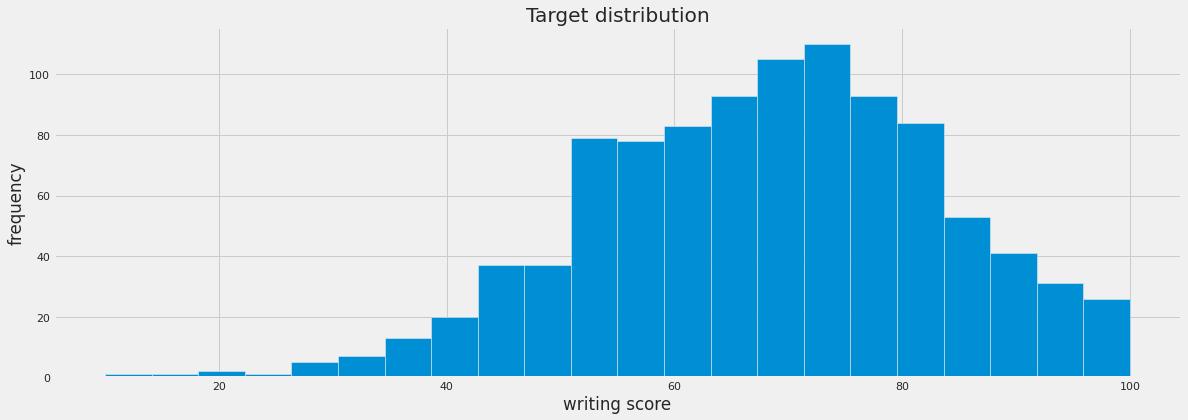

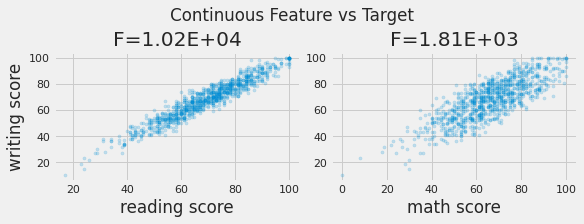

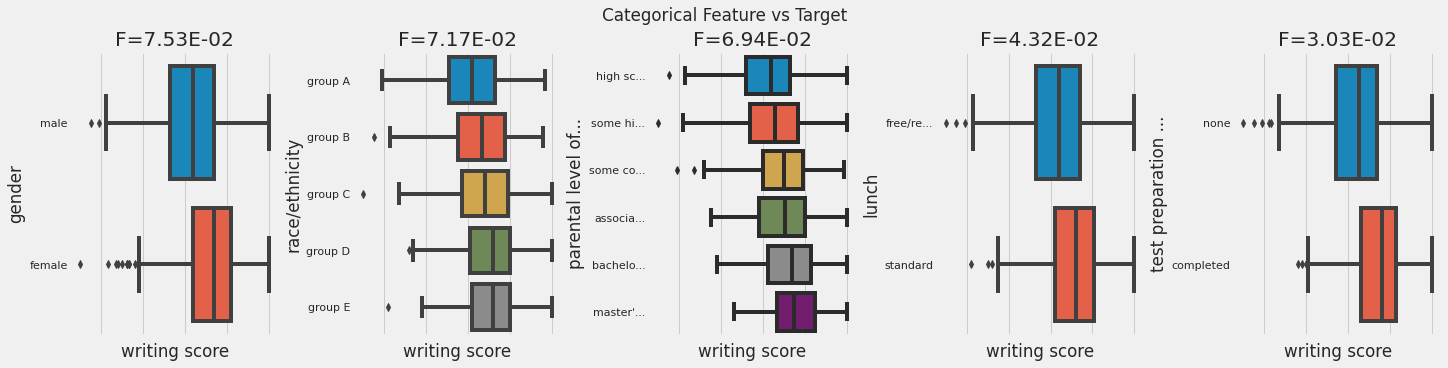

In [23]:
plt.rcParams['figure.figsize'] = (18,6)
dabl.plot(df, target_col='writing score')

### Effect of lunch on student's performance

In [25]:
df[['lunch','gender','math score','reading score','writing score']].groupby(['lunch','gender']).agg('median')

math score  reading score  writing score
lunch        gender                                          
free/reduced female        57.0           67.0           68.0
             male          62.0           61.0           59.0
standard     female        67.0           75.0           76.0
             male          72.0           67.5           67.0

In [27]:
df[['test preparation course','gender','math score','reading score','writing score']].groupby(
    ['test preparation course','gender']).agg('median')

math score  reading score  writing score
test preparation course gender                                          
completed               female        67.0           78.0           79.0
                        male          73.0           71.0           70.0
none                    female        62.0           71.0           70.0
                        male          67.0           63.0           60.0

In [30]:
df[['parental level of education','gender','math score','reading score','writing score']].groupby(
    ['parental level of education','gender']).median()

math score  reading score  writing score
parental level of education gender                                          
associate's degree          female        65.0           75.5           74.0
                            male          72.0           68.0           65.5
bachelor's degree           female        67.0           76.0           80.0
                            male          70.0           67.0           68.0
high school                 female        61.0           69.5           68.0
                            male          66.0           61.5           58.5
master's degree             female        64.5           74.0           76.5
                            male          79.0           77.0           74.0
some college                female        65.5           74.0           74.5
                            male          69.0           63.5           62.5
some high school            female        63.0           71.0           72.0
                            male          68.0           66.0           61.5

## Data Visualization

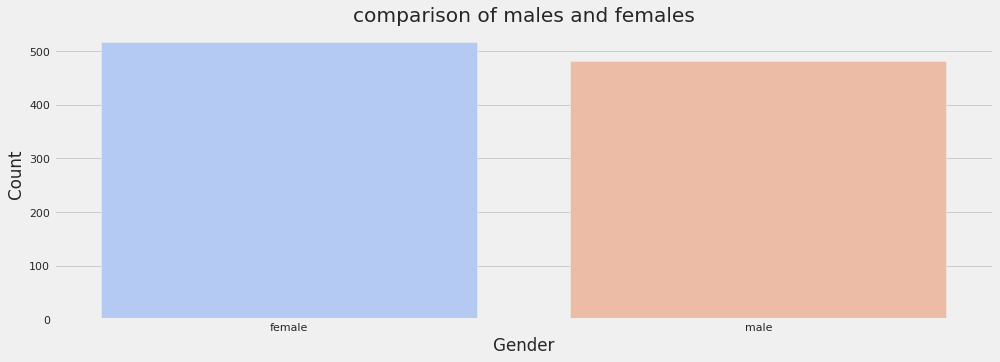

In [33]:
plt.rcParams['figure.figsize'] = (15,5)
sns.countplot(df['gender'], palette='coolwarm')
plt.title('comparison of males and females')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

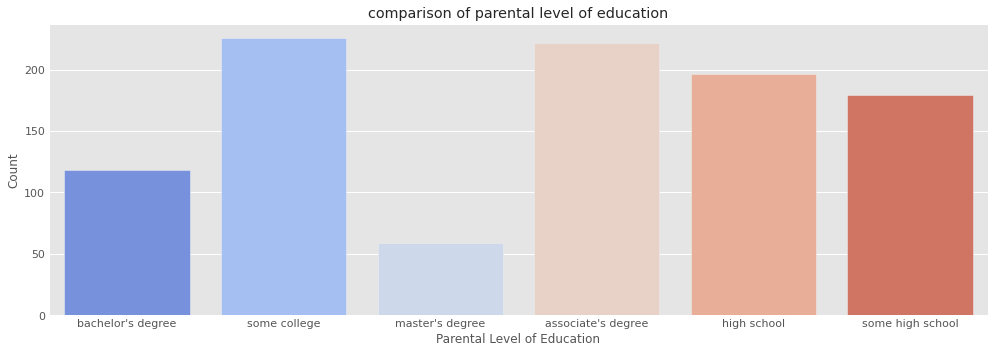

In [34]:
plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('ggplot')
sns.countplot(df['parental level of education'], palette='coolwarm')
plt.title('comparison of parental level of education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Count')
plt.show()

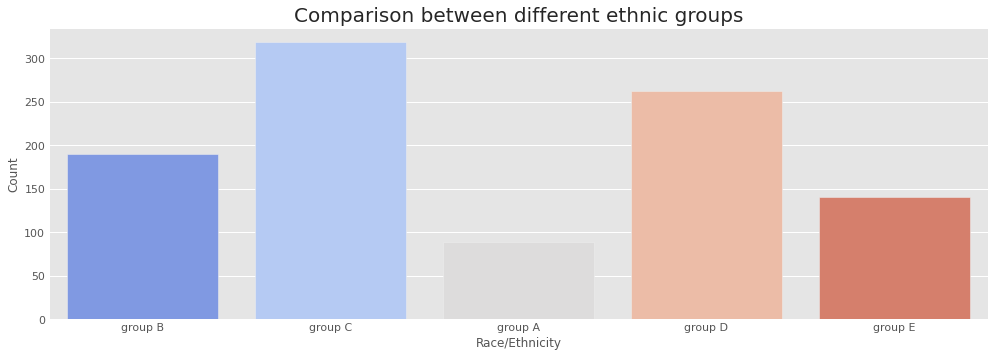

In [37]:
plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('ggplot')
sns.countplot(df['race/ethnicity'], palette='coolwarm')
plt.title('Comparison between different ethnic groups', fontsize=20)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.show()

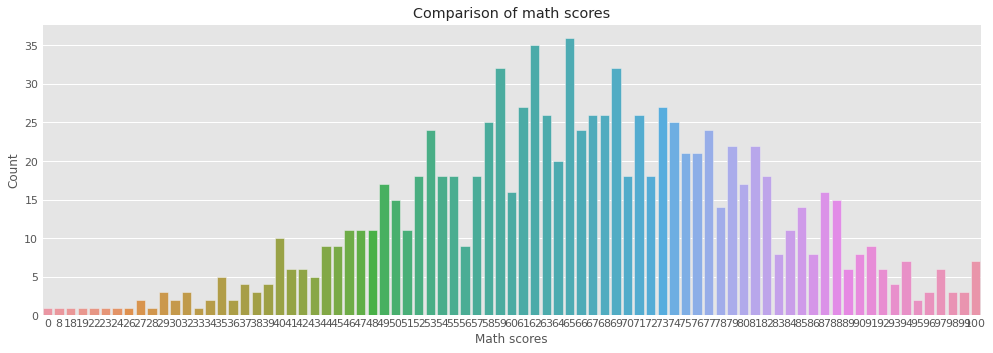

In [41]:
plt.rcParams['figure.figsize'] = (15,5)
sns.countplot(df['math score'])
plt.title('Comparison of math scores')
plt.xlabel('Math scores')
plt.ylabel('Count')
plt.show()

## Computing the total score for each student

In [44]:
df['total score'] = df['math score'] + df['writing score'] + df['reading score']

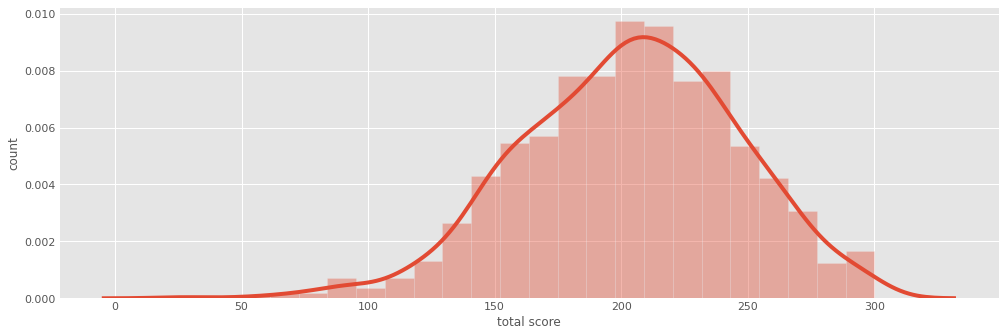

In [48]:
sns.distplot(df['total score'], kde=True)
plt.xlabel('total score')
plt.ylabel('count')
plt.show()

### Computing percentages for each students 

In [55]:
df['percentage'] = df['total score']/3

for i in range(0, 1000):
    df['percentage'][i] = ceil(df['percentage'][i])

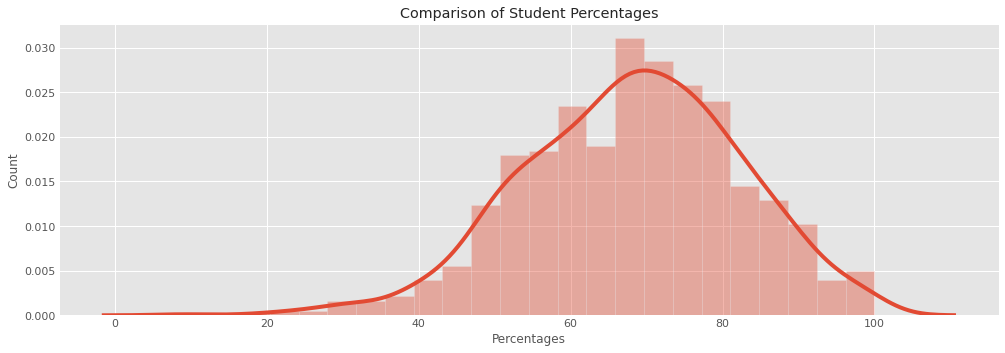

In [59]:
plt.rcParams['figure.figsize'] = (15,5)
sns.distplot(df['percentage'])
plt.title('Comparison of Student Percentages')
plt.xlabel('Percentages')
plt.ylabel('Count')
plt.show()

In [83]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,percentage
0,0,2,1,1,1,72,72,74,218,73.0
1,0,3,4,1,0,69,90,88,247,83.0
2,0,2,3,1,1,90,95,93,278,93.0
3,1,1,0,0,1,47,57,44,148,50.0
4,1,3,4,1,1,76,78,75,229,77.0
...,...,...,...,...,...,...,...,...,...,...
995,0,5,3,1,0,88,99,95,282,94.0
996,1,3,2,0,1,62,55,55,172,58.0
997,0,3,2,0,0,59,71,65,195,65.0
998,0,4,4,1,0,68,78,77,223,75.0


# Label Encoding 

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()

In [63]:
df['test preparation course'] = le.fit_transform(df['test preparation course'])

In [65]:
df['lunch'] = le.fit_transform(df['lunch'])

In [66]:
df.gender = le.fit_transform(df.gender)

In [68]:
df['race/ethnicity'] = df['race/ethnicity'].replace('group A', 1)
df['race/ethnicity'] = df['race/ethnicity'].replace('group B', 2)
df['race/ethnicity'] = df['race/ethnicity'].replace('group C', 3)
df['race/ethnicity'] = df['race/ethnicity'].replace('group D', 4)
df['race/ethnicity'] = df['race/ethnicity'].replace('group E', 5)

In [69]:
df['parental level of education'] = le.fit_transform(df['parental level of education'])

In [76]:
df.shape

(1000, 10)

In [84]:
x = df.drop('percentage', axis =1)

In [85]:
y = df.percentage

## Splitting Dataset

In [78]:
from sklearn.model_selection import train_test_split

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [190]:
x_train.shape

(800, 9)

In [191]:
y_train.shape

(800,)

### MinMaxScaler
* converts values between 0 and 1

In [164]:
from sklearn.preprocessing import MinMaxScaler

In [165]:
mm = MinMaxScaler()

In [166]:
x_train = mm.fit_transform(x_train)
x_test = mm.fit_transform(x_test)

### Principal Component Analysis

In [167]:
from sklearn.decomposition import PCA

In [168]:
#creating principal component analysis model
pca = PCA(n_components=None)

In [169]:
#feeding indipendent varaibles to the PCA model

x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

In [170]:
#visualizing the principal components that explain the highest share of variance 

explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[2.67989437e-01 2.32871028e-01 2.00513471e-01 1.30076144e-01
 9.39221333e-02 6.98841644e-02 3.13888811e-03 1.60473384e-03
 4.85416709e-33]


In [171]:
# creating a principal component analysis model 

In [192]:
pca = PCA(n_components=2)

In [193]:
# feeding the independent variables to the PCA model

x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

# Modeling 

### Logistic Regression

In [174]:
from sklearn.linear_model import LogisticRegression

In [175]:
model = LogisticRegression()

In [194]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [195]:
y_pred = model.predict(x_test)
y_pred

array([68., 71., 69., 50., 56., 54., 73., 66., 83., 49., 64., 64., 67.,
       53., 71., 50., 60., 86., 68., 58., 75., 65., 50., 52., 67., 52.,
       98., 64., 75., 49., 70., 58., 70., 77., 56., 50., 87., 62., 38.,
       63., 77., 77., 55., 83., 50., 71., 56., 78., 89., 44., 65., 88.,
       52., 58., 80., 87., 68., 67., 69., 64., 82., 73., 70., 70., 62.,
       49., 73., 69., 56., 76., 92., 70., 49., 74., 67., 68., 68., 80.,
       77., 39., 76., 74., 67., 75., 69., 45., 62., 89., 87., 59., 60.,
       52., 68., 68., 66., 58., 78., 58., 80., 86., 50., 72., 86., 75.,
       49., 70., 66., 48., 60., 59., 78., 50., 62., 44., 92., 73., 59.,
       83., 58., 98., 54., 69., 59., 73., 69., 74., 62., 74., 90., 64.,
       57., 63., 63., 97., 87., 68., 74., 61., 72., 70., 81., 67., 83.,
       68., 54., 90., 56., 81., 98., 72., 58., 50., 89., 86., 70., 58.,
       51., 79., 78., 60., 56., 92., 93., 71., 68., 26., 66., 68., 70.,
       65., 83., 61., 79., 69., 69., 87., 50., 75., 88., 80., 71

In [196]:
y_test

97     69.0
918    72.0
29     69.0
842    35.0
665    57.0
       ... 
909    68.0
838    56.0
513    59.0
757    70.0
927    66.0
Name: percentage, Length: 200, dtype: float64

In [197]:
model.score(x_test, y_test)

0.53

## Random Forest

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [199]:
model = RandomForestClassifier()

In [200]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [201]:
model.predict(x_test)

array([68., 71., 69., 40., 56., 54., 73., 66., 83., 49., 64., 64., 67.,
       53., 71., 50., 60., 86., 67., 58., 75., 65., 50., 52., 67., 52.,
       98., 64., 75., 49., 70., 58., 70., 77., 56., 50., 87., 62., 38.,
       63., 77., 77., 55., 83., 50., 71., 56., 78., 89., 44., 65., 88.,
       52., 58., 80., 87., 68., 67., 69., 64., 82., 73., 70., 70., 62.,
       49., 73., 69., 56., 76., 91., 70., 49., 74., 67., 68., 68., 80.,
       77., 39., 76., 74., 67., 75., 69., 45., 62., 89., 87., 59., 60.,
       52., 68., 68., 66., 58., 78., 58., 80., 86., 50., 72., 86., 75.,
       49., 70., 66., 48., 60., 59., 78., 54., 62., 41., 92., 73., 60.,
       83., 57., 98., 54., 69., 60., 73., 69., 74., 62., 74., 90., 64.,
       57., 63., 63., 97., 87., 68., 74., 61., 72., 70., 81., 67., 78.,
       68., 55., 89., 56., 81., 98., 72., 58., 50., 89., 86., 70., 58.,
       51., 79., 77., 60., 56., 92., 93., 71., 68., 26., 66., 68., 70.,
       65., 83., 61., 78., 69., 69., 86., 50., 75., 88., 80., 71

In [202]:
y_test

97     69.0
918    72.0
29     69.0
842    35.0
665    57.0
       ... 
909    68.0
838    56.0
513    59.0
757    70.0
927    66.0
Name: percentage, Length: 200, dtype: float64

In [203]:
model.score(x_test, y_test)

0.535